In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

$$ \begin{cases}
    x'= y \\
    y'= -\frac{3}{2}\frac{y^2}{x} + \beta x^{-(3n+1)}- \frac{1}{x}\\
  \end{cases} $$

In [3]:


#esta f es la funcion en donde escribo el sistema de funciones
def f(x,y):
    beta = 1
    n = 1
    
    f_x = y
    f_y = -3/2 * y**2 / x + beta * x**(-3*n-1) - 1/x
    return f_x , f_y

#esta funcion es analoga a las funciones u de los otros ejercicios
def u(X,t):
    x,y = X
    f_x , f_y = f(x,y)
    return np.array([f_x,f_y])

def paso_RK(X, u, t, dt):
    """
    Calcula X(t+dt) a partir de X(t) y el campo de velocidades.

    Parámetros:
    X : Solución a tiempo t (X(t)) cómo arreglo de dimensión d
    u : Campo de velocidades cómo función de (x,t)
    t : Tiempo donde se conoce t
    dt: Paso temporal
    """
    k1 = u(X,t)
    k2 = u(X+k1*dt/2,t)
    k3 = u(X+k2*dt/2,t)
    k4 = u(X+k3*dt,t)
    X = X + (k1 + 2*(k2+k3) + k4)/6*dt
    #t = t + dt
    return X

def trayectoria(X0, u, N, dt):
    """
    Calcula numéricamente la solución a dX/ds = u(X,t) cómo
    un arreglo, usando el esquema definido previamente

    Parámetros:
    X0: Condición inicial cómo arreglo de dimensión d
    u : Campo de velocidades cómo función de (x,t)
    N : Número de pasos temporales
    dt: Paso temporal
    """
    d = X0.shape[0]            # Dimensión del problema
    ts = np.arange(0, N+1)*dt  # Tiempos donde calcularé la solución
    Xs = np.zeros((N+1, d))    # Solución aproximada
    Xs[0] = X0                 # Impongo la condición inicial a t=0
    for j in range(N):
    # Aplico esquema anterior sobre Xs[j] para obtener Xs[j+1]
        #Xs[j+1] = esquema_midpoint(Xs[j], u, ts[j], dt)
        Xs[j+1] = paso_RK(Xs[j], u, ts[j], dt)
        
    return ts, Xs

In [12]:
#parametros iniciales y de pasos    
N = 1000
dt = 1e-3
p0s = np.array([[1,i] for i in np.linspace(0,1,5)])
p0s

array([[1.  , 0.  ],
       [1.  , 0.25],
       [1.  , 0.5 ],
       [1.  , 0.75],
       [1.  , 1.  ]])

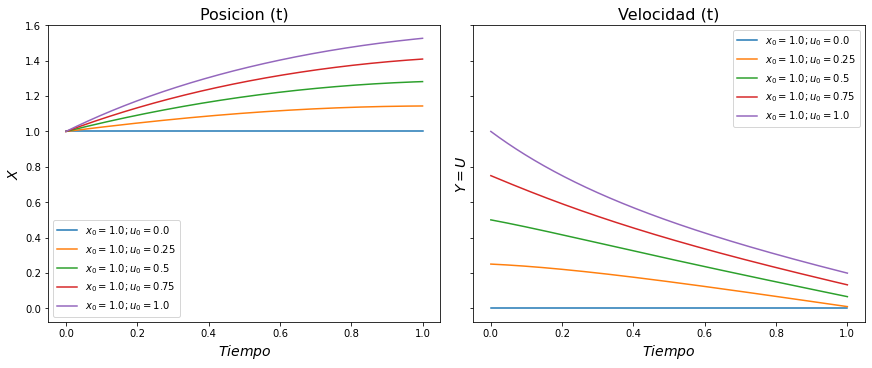

In [23]:

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12,5), constrained_layout=True,
                               sharex=True, sharey=True)


# la unica diferencia con los ejercicios en 1d es como interpretar las variables:
# antes x,y era una descripcion bidimensional. Ahora x es pposicion e y es la velocidad
for i,p0 in enumerate(p0s):
    _, Xs = trayectoria(p0, u, N, dt)
    t = np.arange(0, N+1)*dt
    ax1.plot(t,Xs[:,0], label  = f"$x_0 = {p0[0]} ; u_0 = {p0[1]}$")
    ax2.plot(t,Xs[:,1], label = f"$x_0 = {p0[0]} ; u_0 = {p0[1]}$" )



#ax1.set_xlim(-4,4)
#ax1.set_ylim(-4,4)
ax1.set_xlabel('$Tiempo$', fontsize=14)
ax1.set_ylabel('$X$', fontsize=14)
ax1.set_title(f'Posicion (t)', fontsize=16)
ax2.set_xlabel('$Tiempo$', fontsize=14)
ax2.set_ylabel('$Y = U$', fontsize=14)
ax2.set_title(f'Velocidad (t)', fontsize=16)
ax1.legend()
ax2.legend()

In [5]:
def p0_(r,th):
    x = r*np.cos(th)
    y = r*np.sin(th)
    return [x,y]


def polar_to_cart(r,th):
    x = r*np.cos(th)
    y = r*np.sin(th)
    return x,y

def cart2polar(x,y):
    r = np.sqrt(x**2 + y**2)
    if x>0:
        th = np.arctan(y/x)
    elif x<0:
        th = np.arctan(y/x) + np.pi
    elif x == 0 and y > 0:
        th = np.pi/2
    elif x==0 and y<0:
        th = -np.pi/2
    return r,th